In [3]:
import cv2
import os
import sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

from PIL import Image, ImageDraw, ImageFont

import matplotlib.pyplot as plt
import numpy as np

import konfuzio_sdk
from konfuzio_sdk.data import Project
from konfuzio_sdk.tokenizer.regex import WhitespaceTokenizer
from tests.variables import OFFLINE_PROJECT

In [10]:
project = Project(id_=None, project_folder=OFFLINE_PROJECT)

In [11]:
documents = project.documents

In [12]:
document = documents[9]

In [14]:
document.get_images()

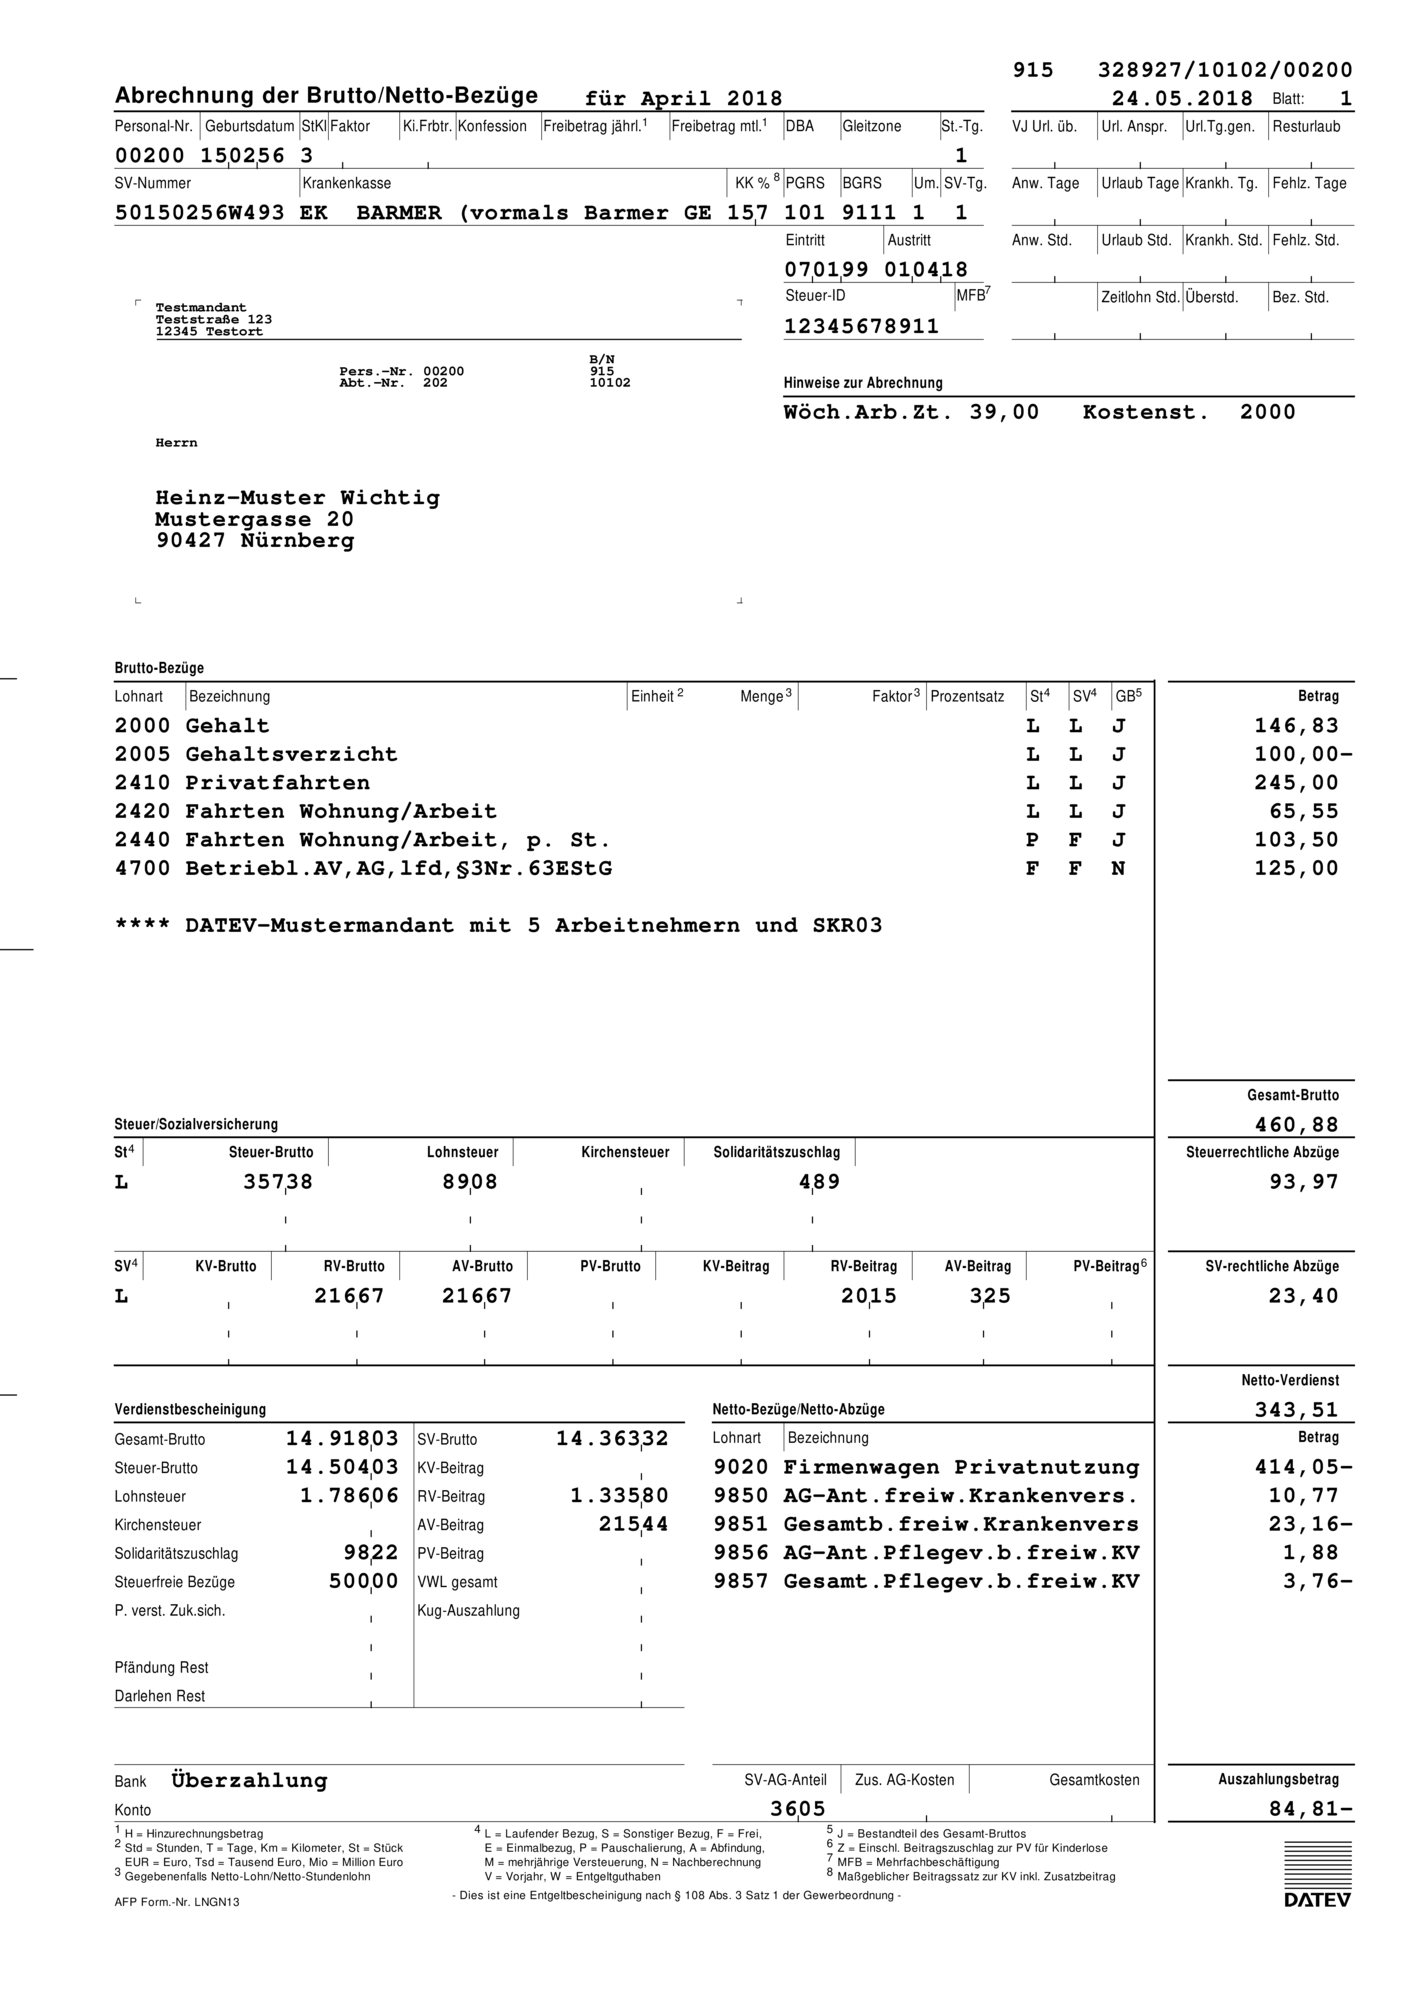

In [15]:
# img_file = '../../test.png'
img_file = document.image_paths[0]

img = Image.open(img_file)
img

## OpenCV

In [16]:
img = cv2.imread(img_file, 0)

In [17]:
orig_img = img.copy()
orig_img = Image.fromarray(orig_img)
orig_img = orig_img.convert('RGB')
# orig_img
orig_img = np.array(orig_img)
orig_img.shape

(2000, 1414, 3)

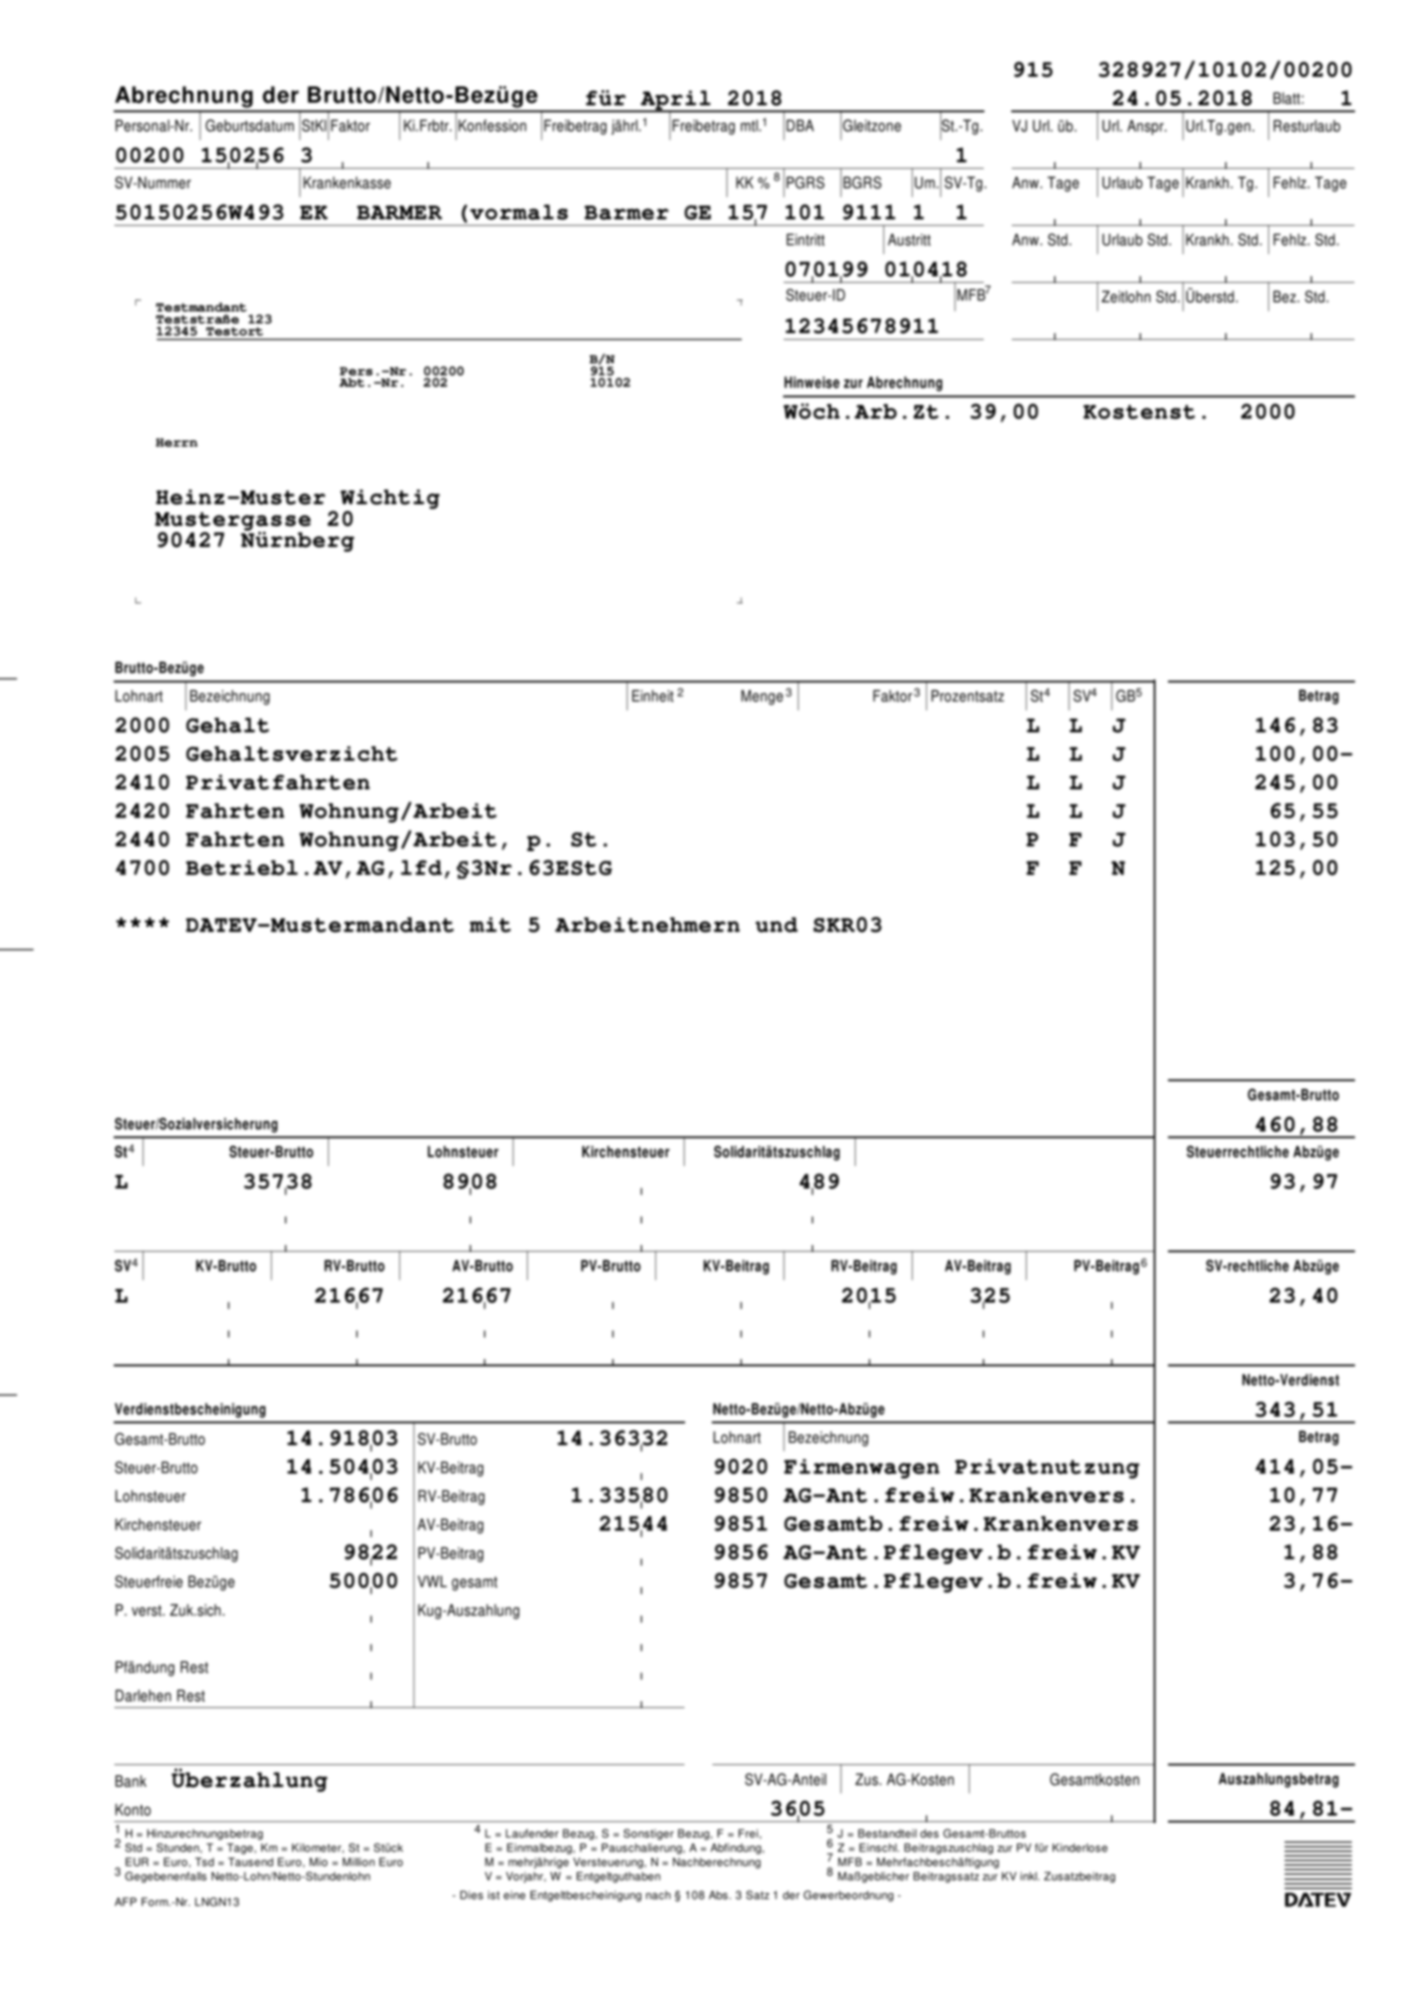

In [134]:
for _ in range(3):
    img = cv2.GaussianBlur(img, (3,3), 1, 0.1)
#img
Image.fromarray(img)

In [135]:
cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU, img)

(200.0,
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

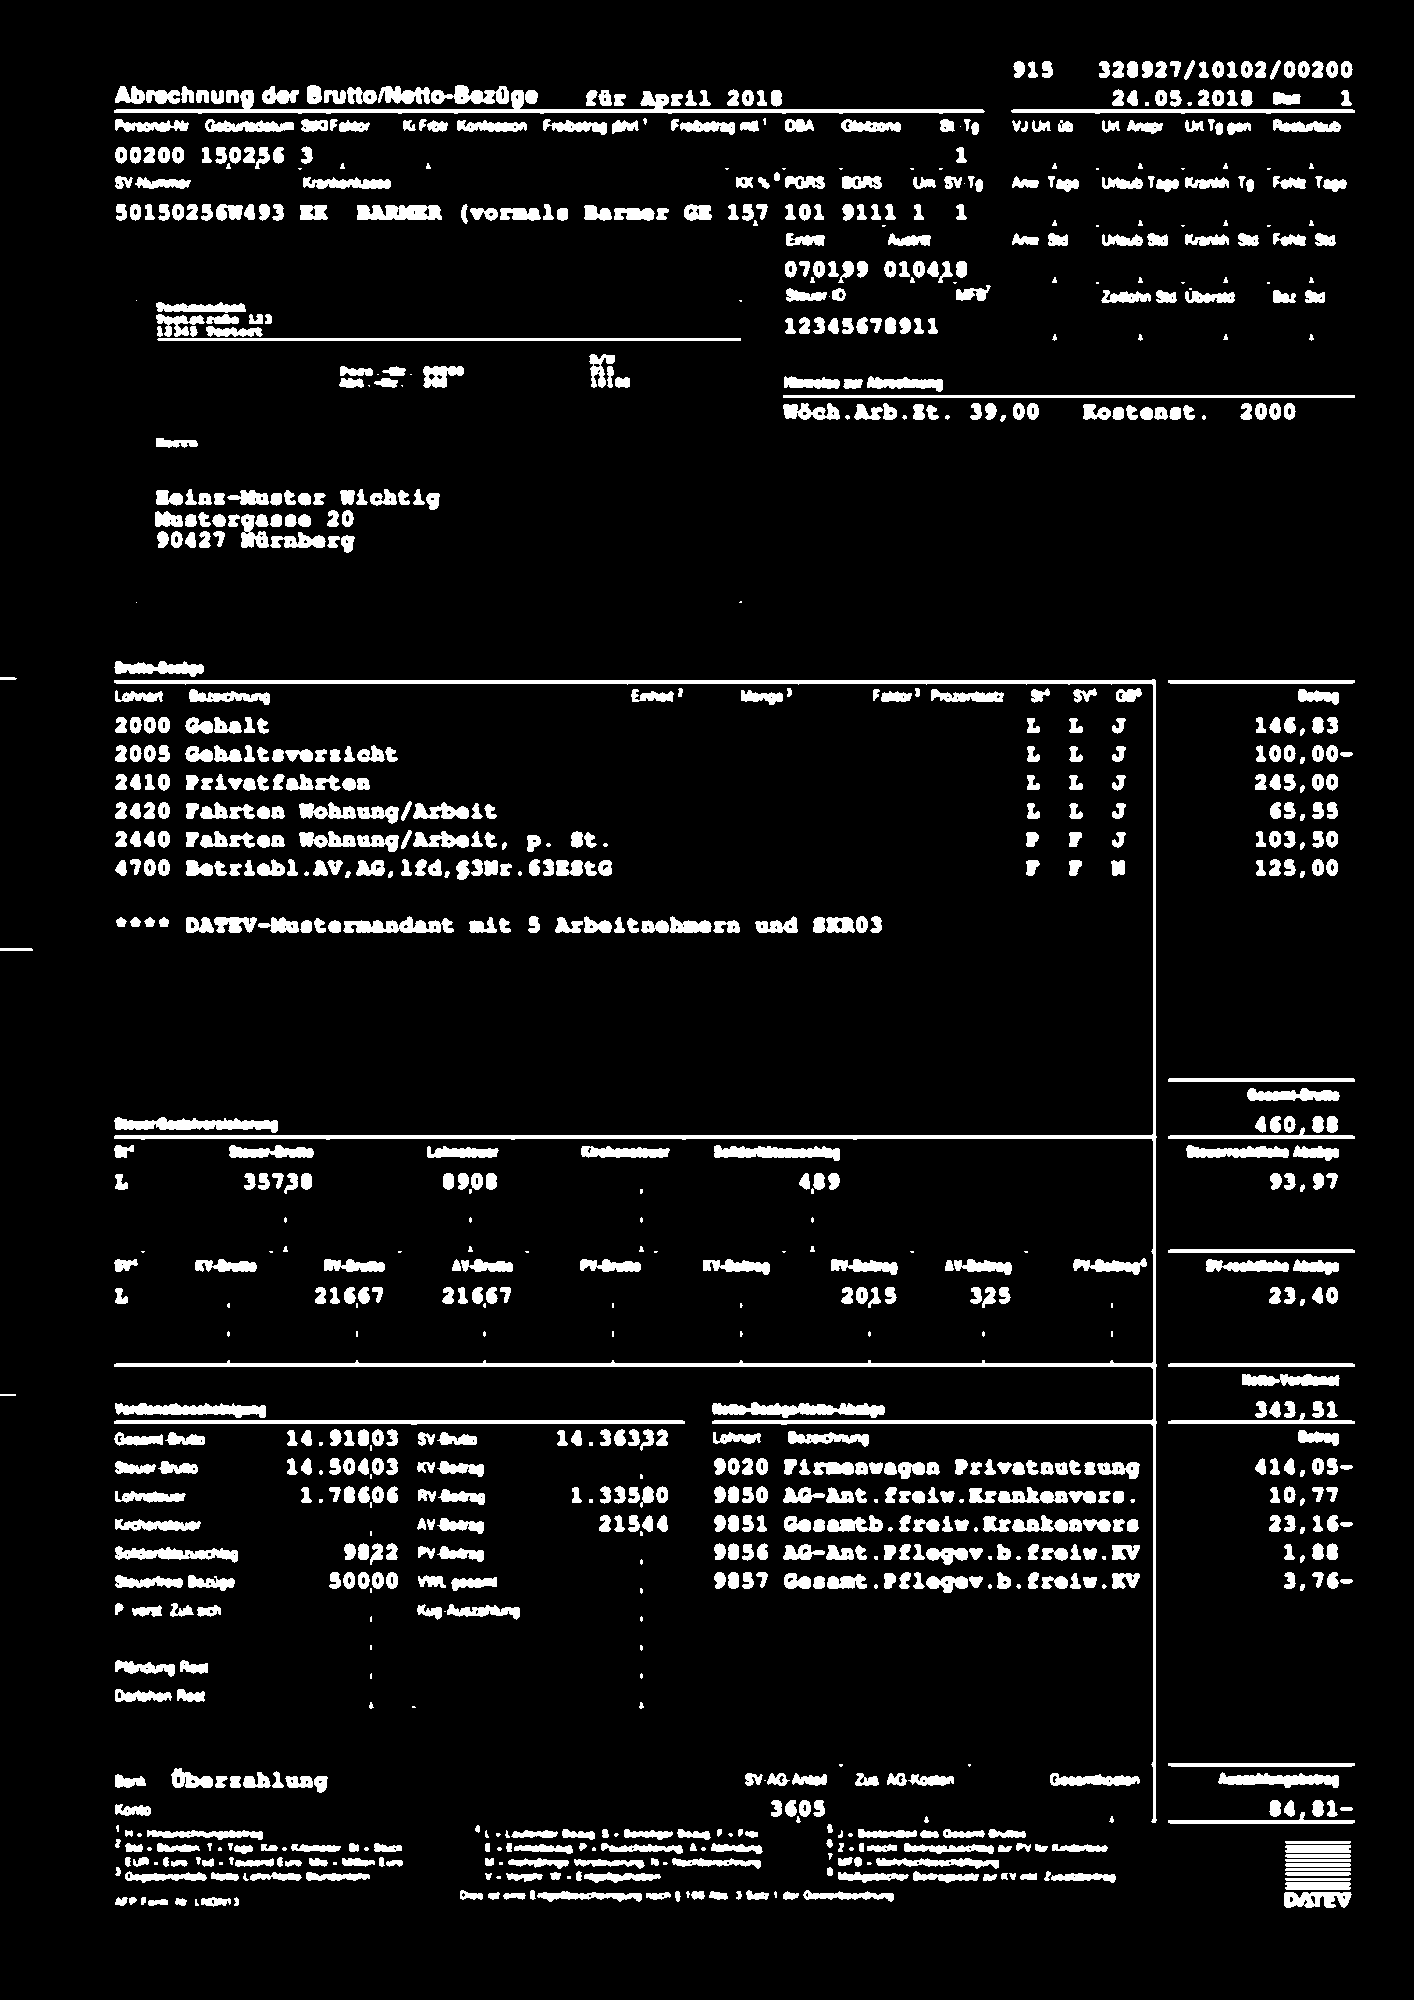

In [136]:
Image.fromarray(img)

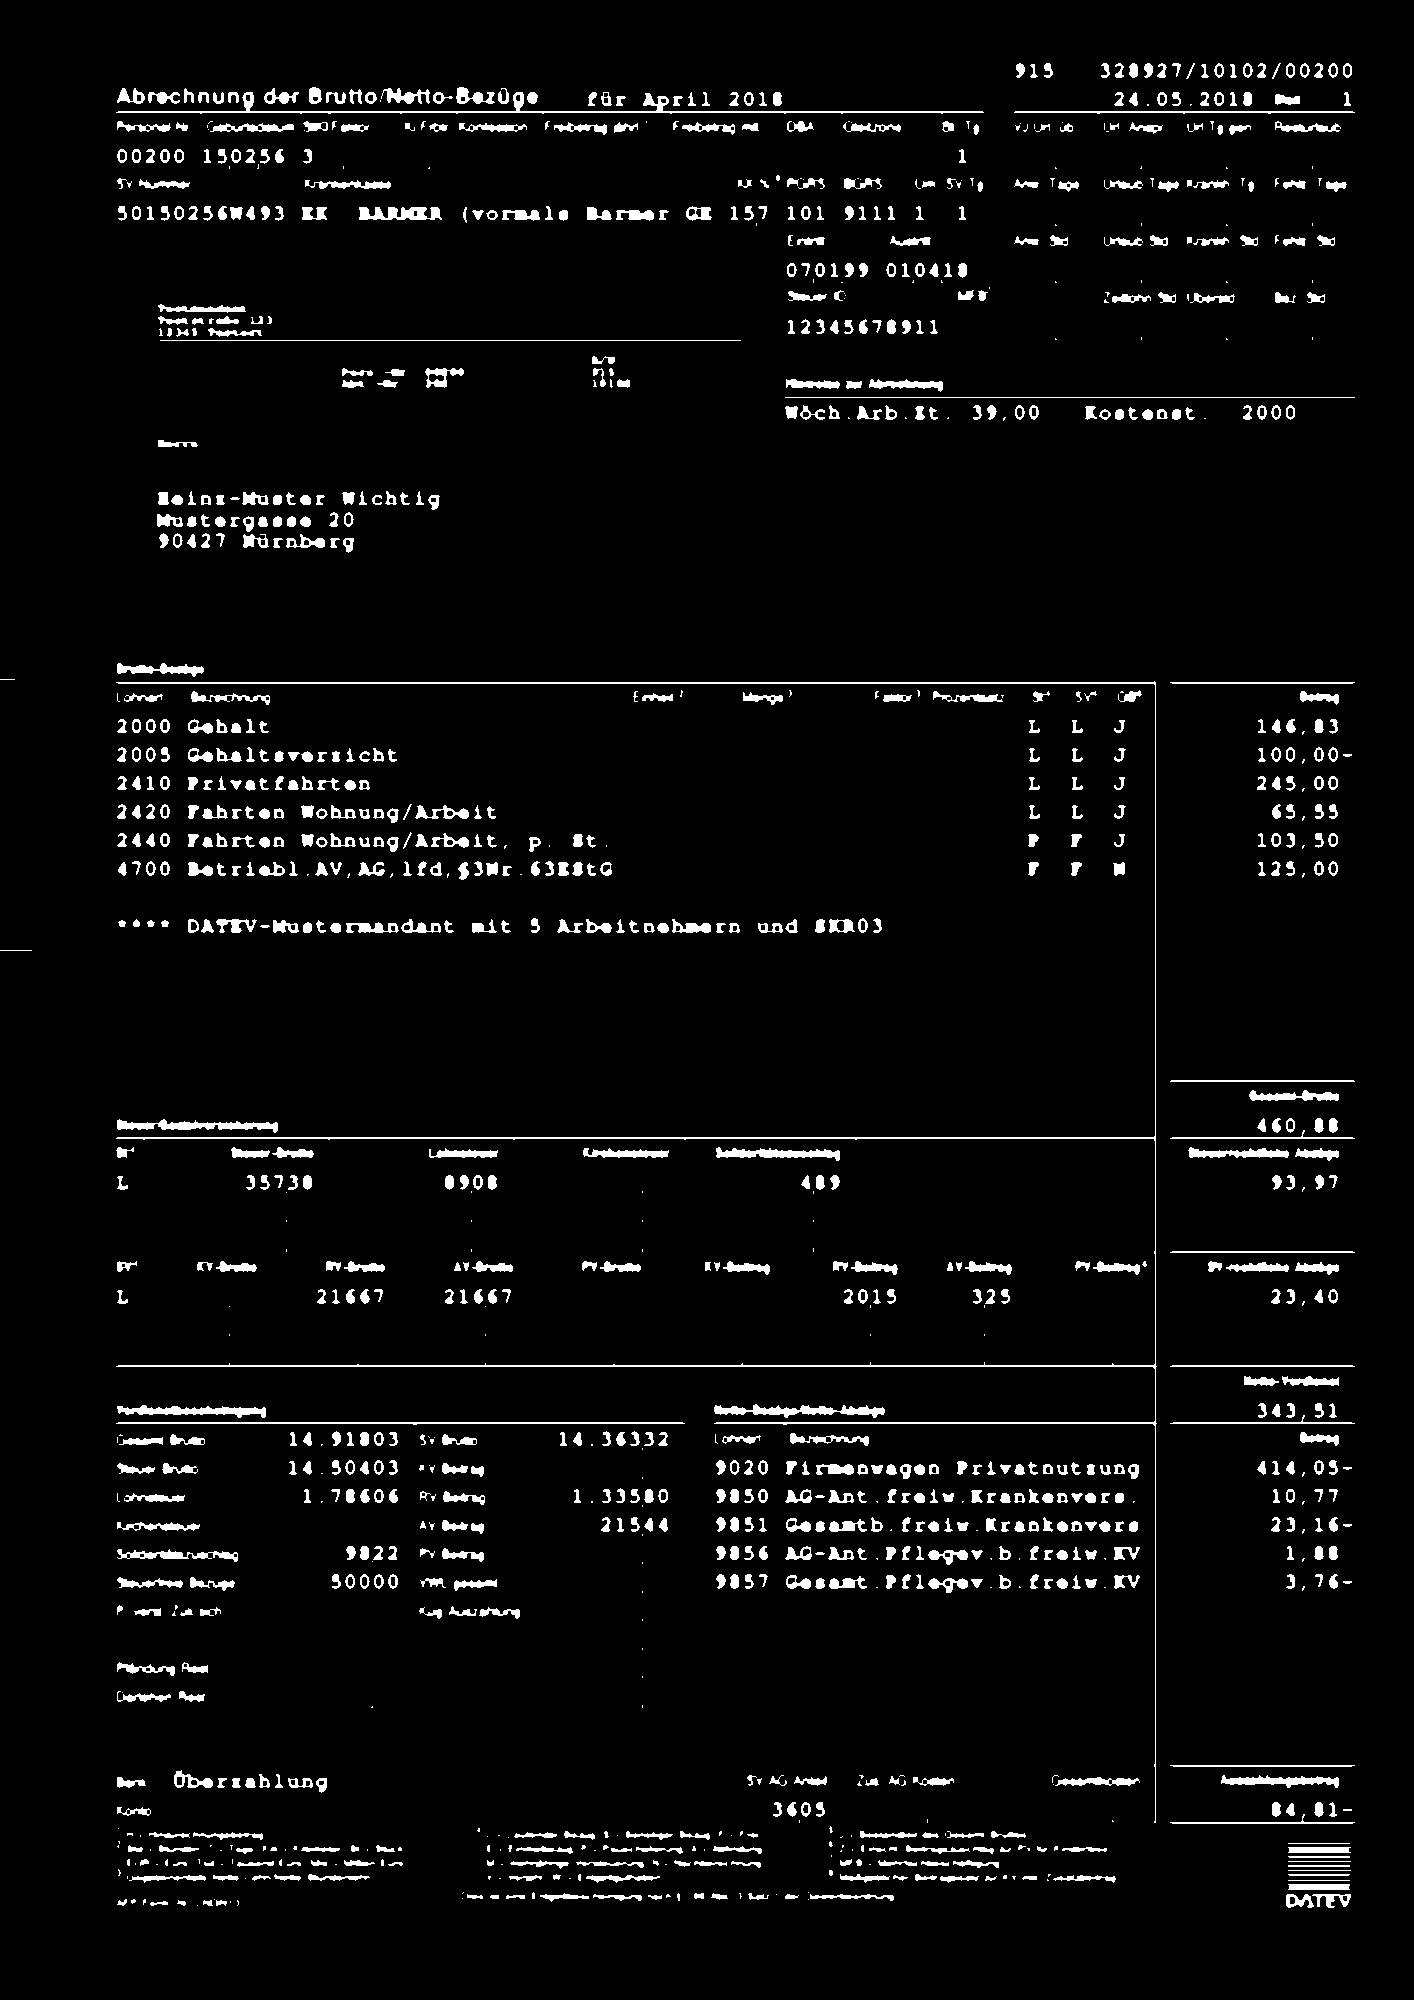

In [138]:
img = cv2.erode(img, np.ones((2,2), np.uint8), iterations=1)
Image.fromarray(img)

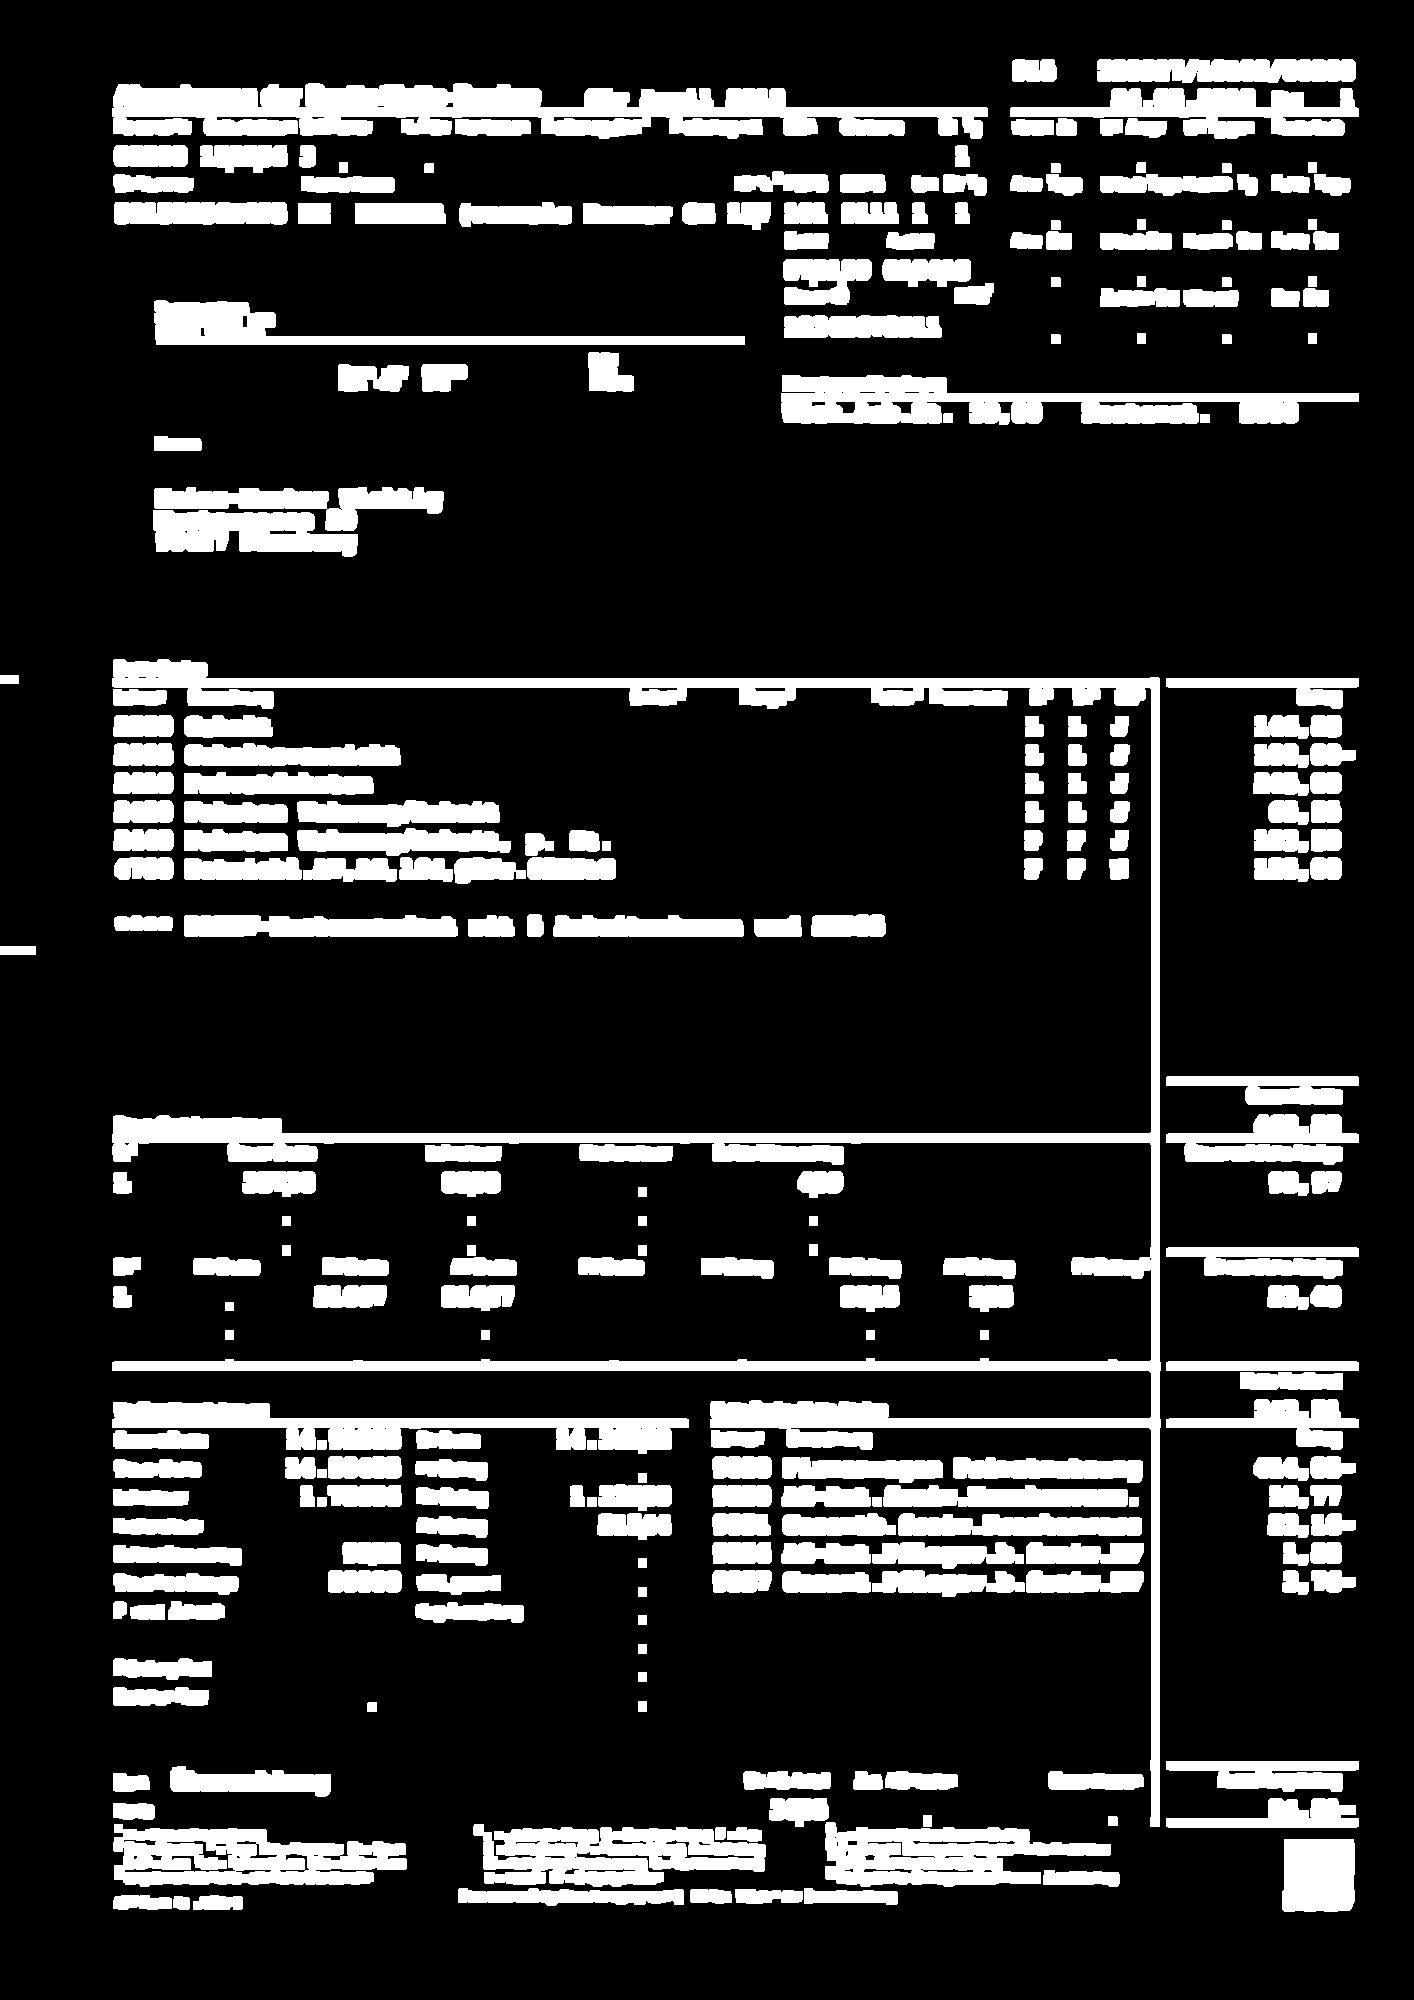

In [140]:
# img = cv2.dilate(img, cv2.getStructuringElement(cv2.MORPH_RECT, (3, 13)), iterations=2)
kernel = np.ones((5, 5), 'uint8')
img = cv2.dilate(img, kernel)
Image.fromarray(img)

In [47]:
# img = cv2.erode(img, np.ones((2,2),np.uint8), iterations=1)

# img = cv2.dilate(img, cv2.getStructuringElement(cv2.MORPH_RECT, (3, 13)), iterations=2)

# img = cv2.erode(img, np.ones((2,2),np.uint8), iterations=1)


# Image.fromarray(img)

In [141]:
contours, hier = cv2.findContours(img, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)


In [96]:
# print(hier)

In [142]:
for c in contours:
#   print()
    if cv2.contourArea(c) > 700:
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(orig_img, (x, y), (x + w, y + h), (0, 0, 255), 2)
    print(cv2.contourArea(c))

189.0
596.5
695.5
775.0
512.5
1102.0
2688.5
965.0
5007.5
361.0
117.5
12368.5
13028.5
11695.0
80.5
88.0
604.5
3077.0
1287.0
552.5
1425.5
1089.5
448.5
1346.5
3010.0
3819.5
80.5
80.0
1439.5
72.0
1539.0
72.0
72.0
462.5
1618.5
819.5
198.5
72.0
1274.5
1941.0
1599.5
723.5
443.0
2068.0
2573.5
1210.5
1552.5
72.0
1937.5
1106.5
626.5
384.5
2048.0
2542.5
1567.0
1202.0
1215.5
1310.0
1119.5
744.0
774.5
4312.0
2018.0
1195.0
1533.0
80.5
80.5
81.0
80.5
1068.5
1143.5
516.5
700.5
4213.5
1567.0
1208.5
269.0
1466.0
270.0
1542.5
72.0
72.0
1115.0
1348.5
981.5
3447.5
2894.5
579.5
785.5
1247.5
1533.0
81.0
80.5
778.0
996.5
1434.5
12011.5
3891.5
1599.0
1725.0
72.0
72.0
72.0
72.0
64.0
327.5
611.5
773.0
974.5
1280.5
1522.0
1492.0
1179.5
1195.5
1177.0
1058.0
1044.0
1063.0
1059.0
424.5
3933.5
80.0
80.0
80.0
88.0
72.0
72.0
72.0
72.0
72.0
326.0
580.5
746.5
966.0
1287.5
1560.0
1407.5
1147.5
5688.5
3424.5
280.0
831.5
3419.0
832.5
5017.0
790.5
1535.5
329.5
370.0
337.0
338.0
1616.0
644.0
1031.5
1821.5
1316.5
1005.5
2212.5

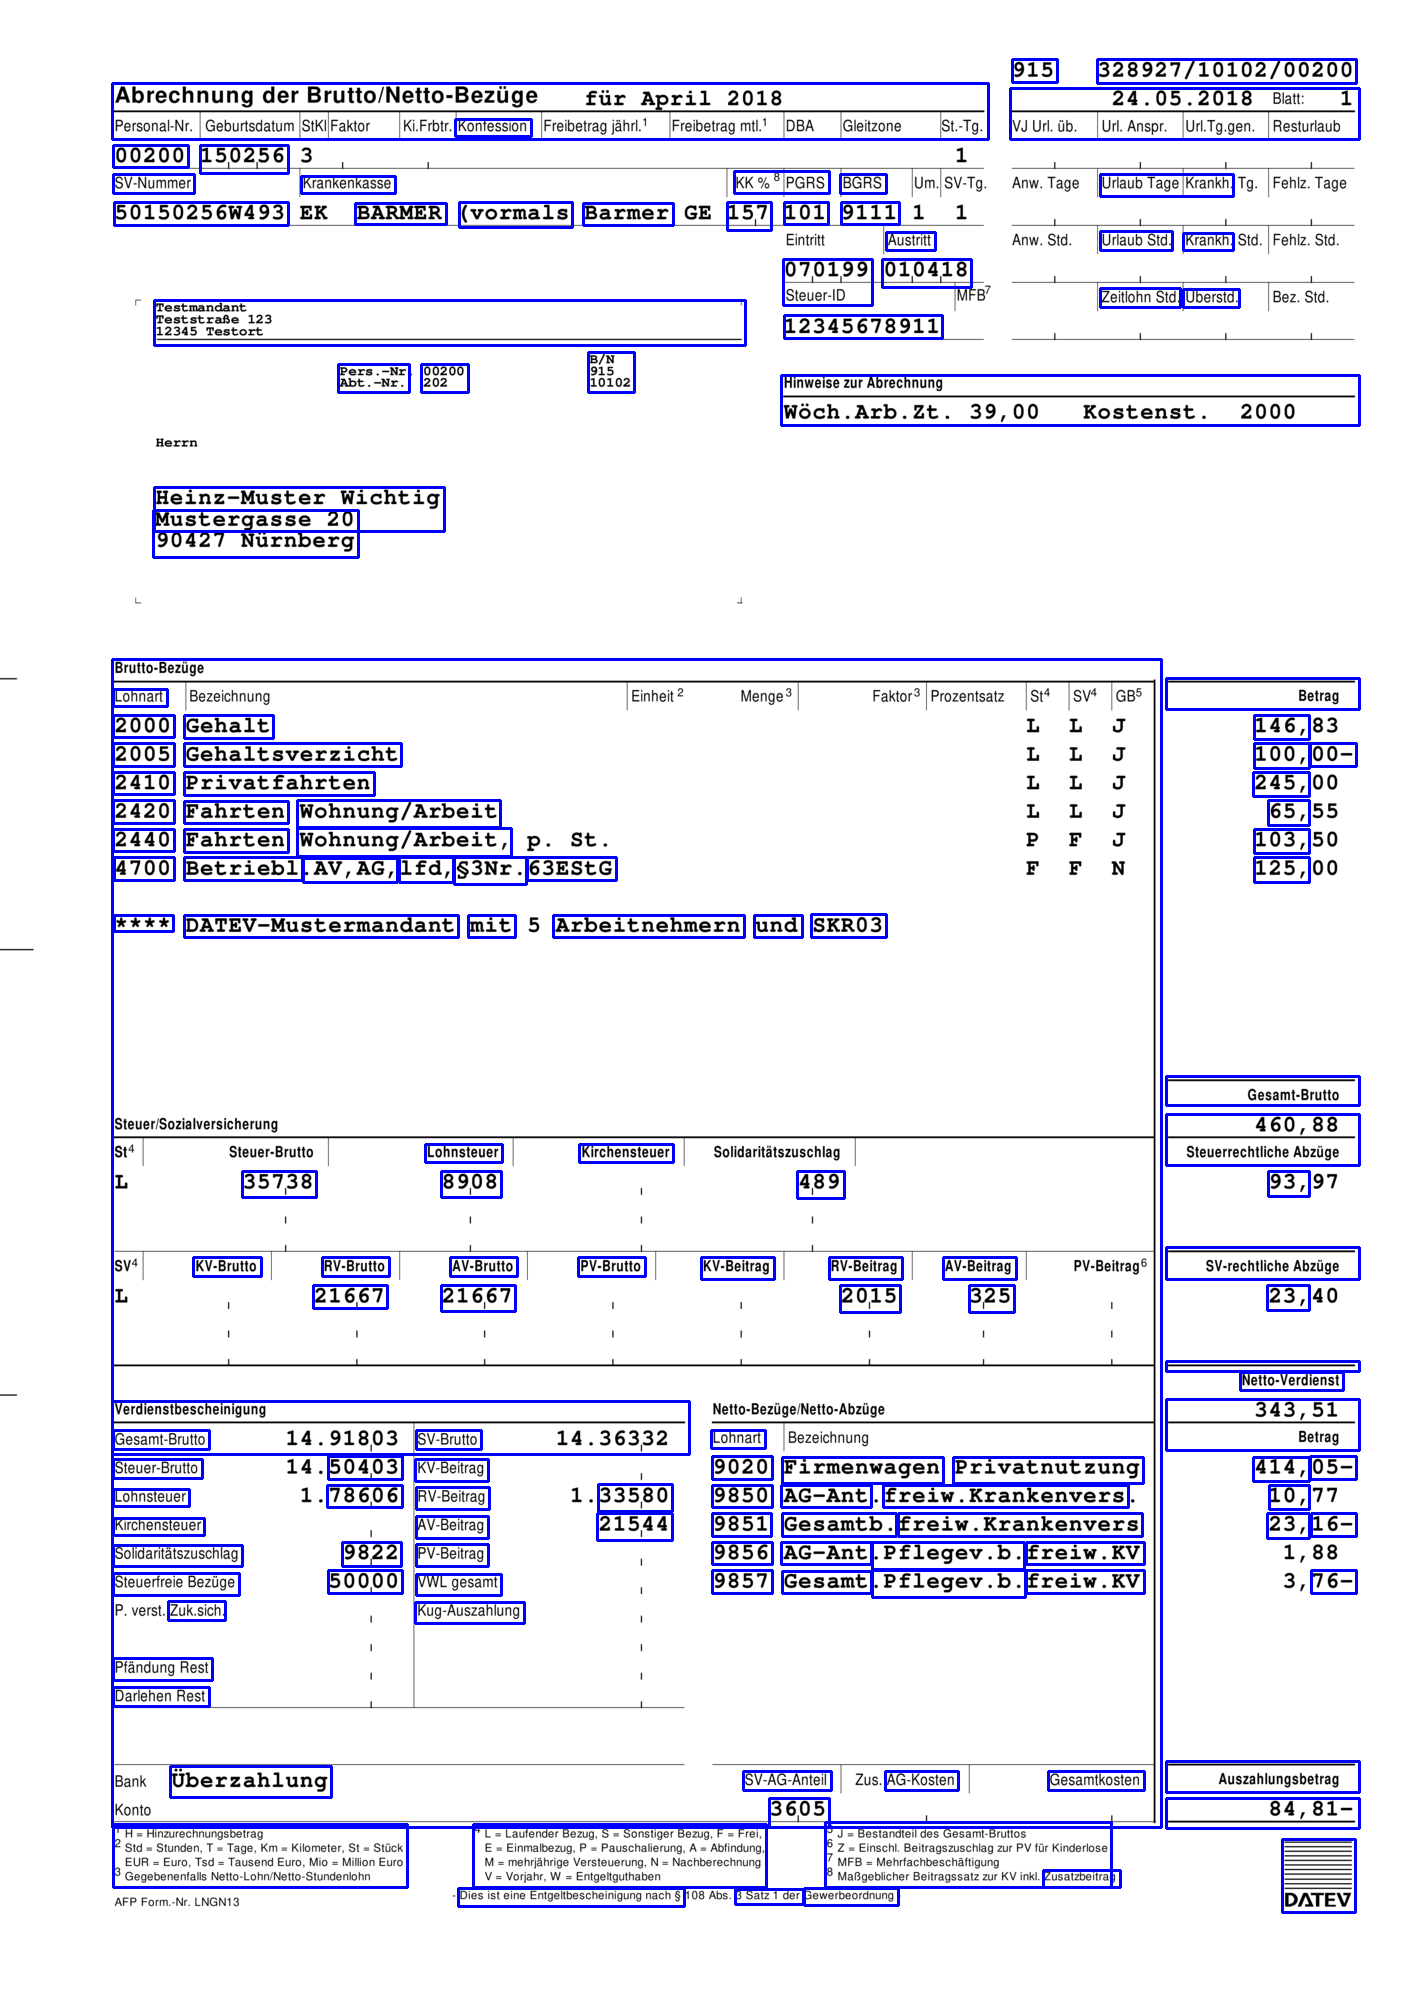

In [143]:
Image.fromarray(orig_img)

## PyTesseract

In [17]:
import pytesseract
import pytesseract
from pytesseract import Output

In [27]:
img = Image.fromarray(img)
img = img.convert('RGB')
# orig_img
img = np.array(img)
h, w, _ = img.shape
# target = pytesseract.image_to_string(image, lang='eng', boxes=False, \
#         config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789')


In [29]:
img.shape

(2000, 1414, 3)

In [34]:
boxes = pytesseract.image_to_boxes(img, config='--psm 3 load_system_dawg = False load_freq_dawg=False')

In [35]:
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 0, 0), 2)

In [36]:
boxes

"~ 0 0 3 1352 0\n~ 114 1887 1355 1891 0\n~ 115 1830 1354 1833 0\n~ 115 1773 1354 1776 0\n~ 784 1716 1354 1719 0\n~ 1097 1689 1098 1832 0\n~ 1268 1689 1269 1832 0\n~ 157 1659 1354 1662 0\n~ 114 1316 1355 1320 0\n~ 114 861 1355 865 0\n~ 115 747 1355 751 0\n~ 114 633 1355 637 0\n~ 114 576 1355 580 0\n~ 115 292 684 293 0\n~ 115 233 1355 238 0\n~ 1153 177 1157 1317 0\n~ 115 176 1355 181 0\n~ 858 162 865 171 0\nx 1012 1923 1025 1937 0\n0 1028 1923 1038 1938 0\n2 1042 1923 1052 1938 0\n3 1099 1923 1109 1938 0\n2 1113 1923 1123 1938 0\n8 1128 1923 1138 1938 0\n9 1143 1923 1153 1938 0\n2 1156 1923 1166 1938 0\n7 1170 1923 1180 1938 0\n/ 1172 1921 1197 1939 0\n1 1185 1921 1209 1939 0\n0 1213 1923 1223 1938 0\n1 1228 1923 1237 1938 0\n0 1242 1923 1252 1938 0\n3 1256 1923 1266 1938 0\n/ 1270 1921 1280 1939 0\n0 1271 1921 1296 1939 0\n0 1285 1923 1309 1938 0\n1 1313 1923 1323 1938 0\n0 1327 1923 1337 1938 0\n4 1341 1923 1351 1938 0\nA 115 1897 130 1914 0\nb 117 1892 142 1914 0\nr 132 1897 154 1914 

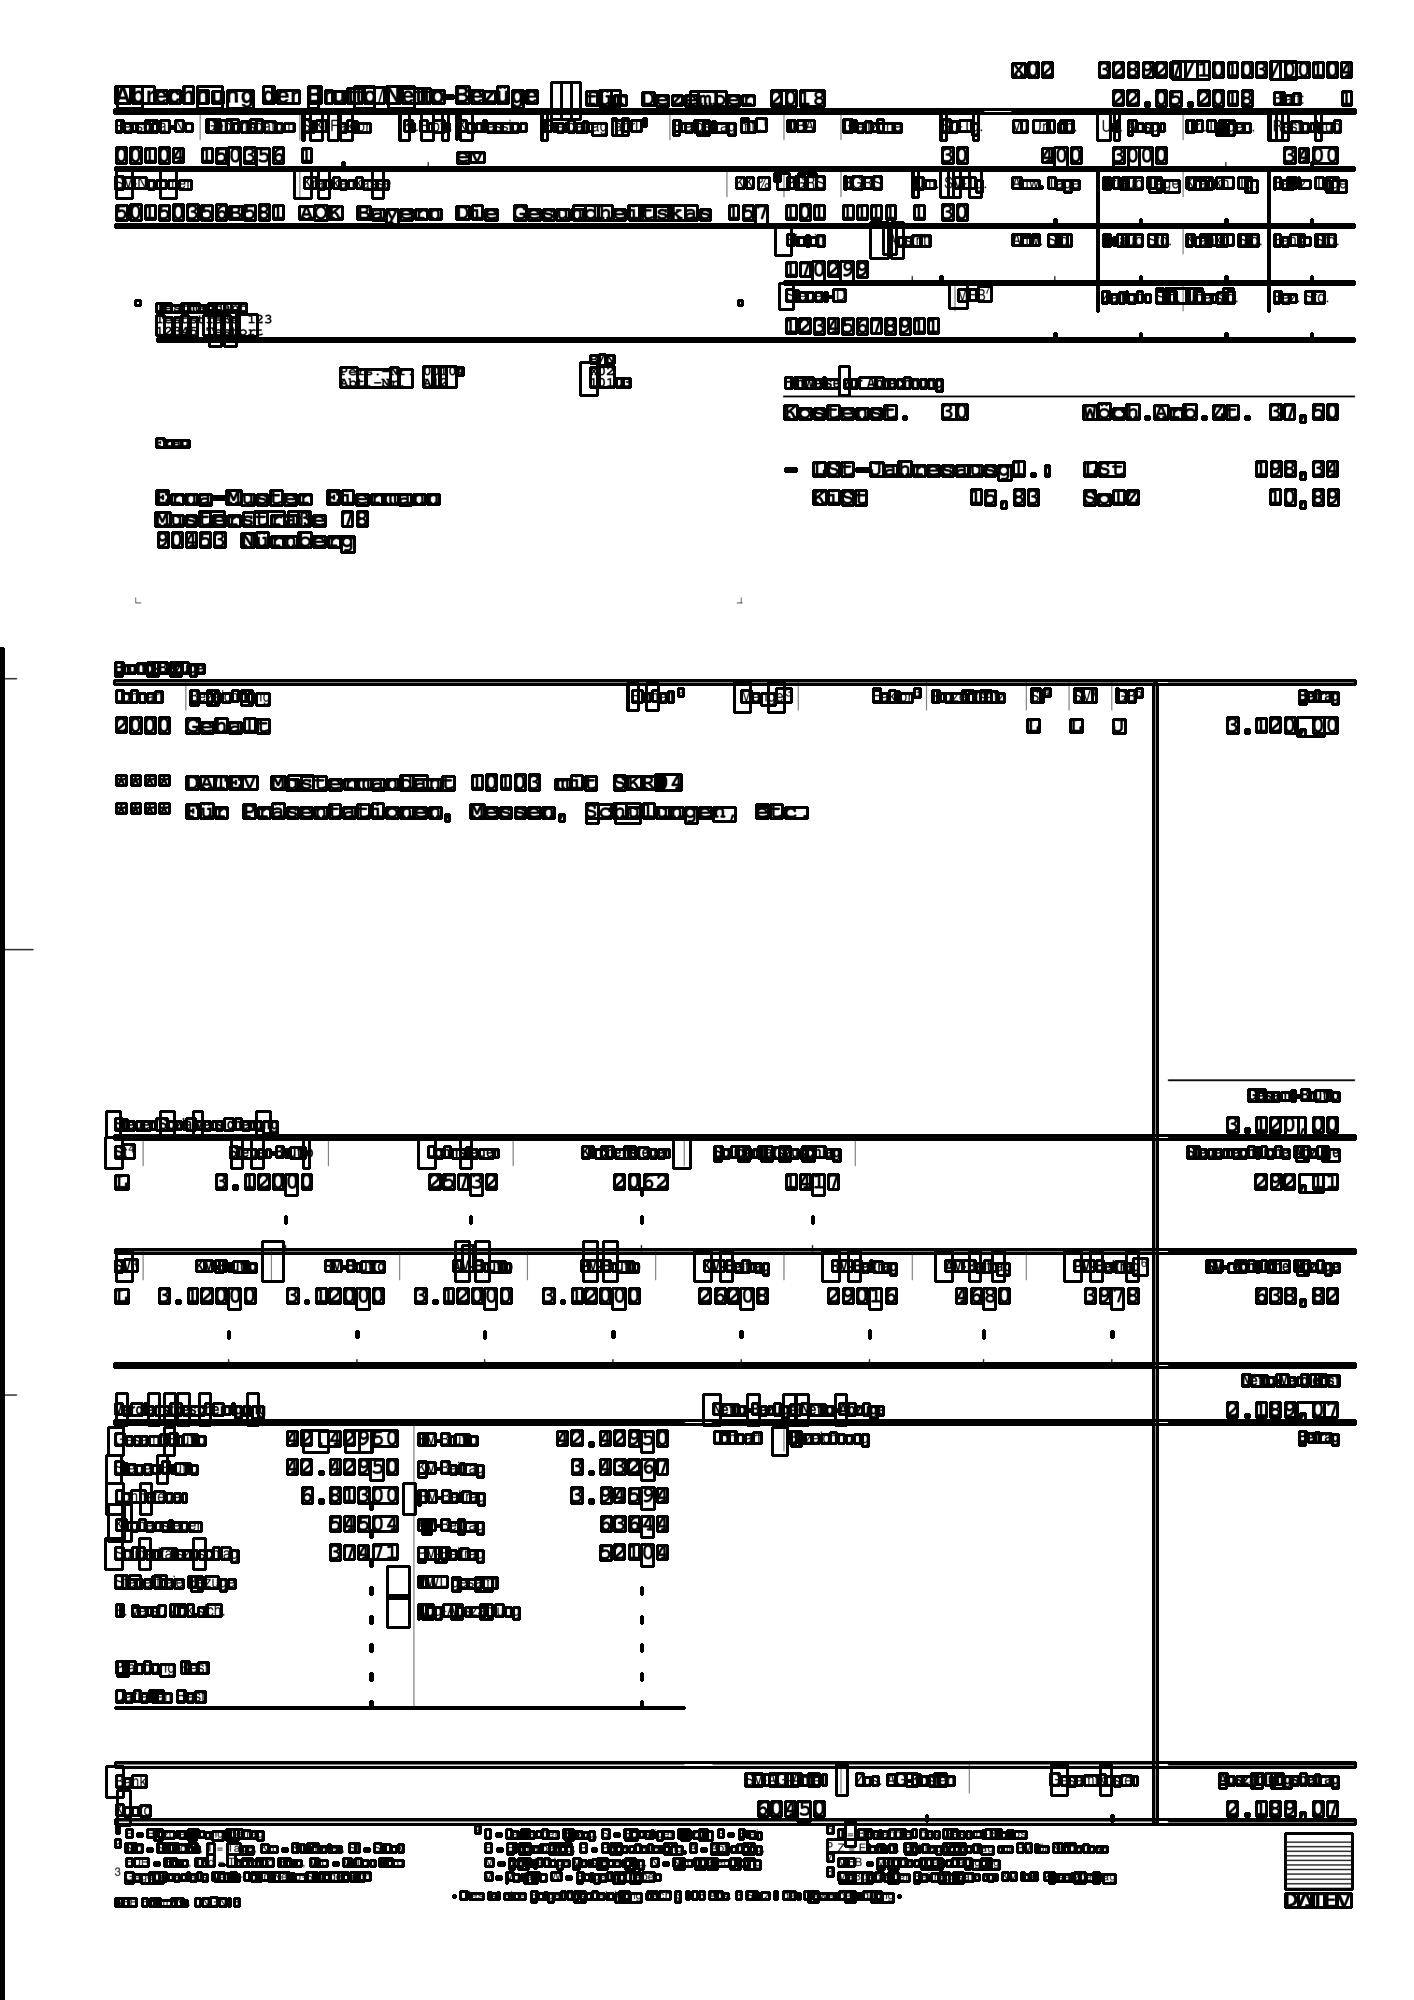

In [37]:
Image.fromarray(img)

## Detectron2?

## Layout Parser

In [22]:
import layoutparser as lp

In [23]:
model = lp.Detectron2LayoutModel(
            config_path ='lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config', # In model catalog
            label_map   ={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"}, # In model`label_map`
#             extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8] # Optional
        )

2022-07-10 02:19:02,452 [fvcore.common.checkp] [MainThread] [INFO    ] [load                ][0150] [Checkpointer] Loading from /home/sam-konf/.torch/iopath_cache/s/dgy9c10wykk4lq4/model_final.pth?dl=1 ...
2022-07-10 02:19:02,603 [detectron2.checkpoin] [MainThread] [INFO    ] [align_and_update_sta][0324] Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                                  | Shapes                                          |
|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,1,1)             |
| backbone.bottom_up.res2.0.conv2.*      

In [28]:
img.shape

(2000, 1414, 3)

In [ ]:
layout_result = model.detect(img)


In [ ]:
lp.draw_box(img, layout, box_width=3, color_map=color_map )
